In [85]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [86]:
#Read in the CSV and read in the data
df = pd.read_csv("../Resources/neighborhood_tier_final.csv")

In [87]:
df.head()

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,...,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars,Average County House Price,Neighborhood Indicator,Neighborhood Tiers
0,37013,TN,Nashville,Davidson County,295552,83,3.096386,4257.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439999.0,0.671711,3
1,37211,TN,Nashville,Davidson County,340382,182,3.491758,12761.0,2.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439999.0,0.773597,2
2,37221,TN,Nashville,Davidson County,401000,69,3.217391,6690.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439999.0,0.911366,2
3,37209,TN,Nashville,Davidson County,445902,147,3.772109,16663.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439999.0,1.013416,2
4,37076,TN,Nashville,Davidson County,328591,81,3.228395,4994.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439999.0,0.746799,3


In [88]:
#drop unneeded columns
df = df.drop(columns=['avg_stars','total_restaurants','postal_code', 'State', 'City', 'CountyName', '2021', "Average County House Price", "Neighborhood Indicator"])

In [89]:
df.head()

,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,...,Donburi_stars,Pita_stars,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars,Neighborhood Tiers
0,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,3.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,6690.0,0.0,3.0,3.0,14.0,20.0,13.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,16663.0,0.0,10.0,2.0,24.0,19.0,18.0,7.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4994.0,0.0,4.0,3.0,12.0,23.0,15.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [90]:
df.shape

(750, 418)

In [91]:
# Create the features
X = df.drop(columns='Neighborhood Tiers')
X.head()

,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,...,Tonkatsu_stars,Donburi_stars,Pita_stars,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars
0,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,3.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6690.0,0.0,3.0,3.0,14.0,20.0,13.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16663.0,0.0,10.0,2.0,24.0,19.0,18.0,7.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4994.0,0.0,4.0,3.0,12.0,23.0,15.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
X.describe()

,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,...,Tonkatsu_stars,Donburi_stars,Pita_stars,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.0,750.000000
mean,4748.614667,0.261333,3.708000,1.670667,5.385333,6.912000,7.754667,1.018667,0.534667,0.966667,...,0.005333,0.005333,0.004000,0.005333,0.005333,0.005333,0.005333,0.005333,0.0,0.005333
std,10636.360840,0.761892,4.575294,2.234472,5.563523,7.940213,7.810579,1.312230,1.286989,2.111753,...,0.146059,0.146059,0.109545,0.146059,0.146059,0.146059,0.146059,0.146059,0.0,0.146059
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,466.500000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1680.000000,0.000000,2.000000,1.000000,4.000000,4.000000,6.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,5106.500000,0.000000,5.000000,2.000000,8.000000,10.750000,11.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,176931.000000,10.000000,41.000000,19.000000,36.000000,44.000000,54.000000,8.000000,15.000000,30.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0,4.000000


In [93]:
#Create target variable
y = df['Neighborhood Tiers']

# PCA

In [36]:
# Initialize PCA model
#pca = PCA(n_components=10)


In [37]:
# Get 10 principal components for the iris data.
#X_pca = pca.fit_transform(X)


In [38]:
#pca.explained_variance_ratio_.sum()

0.9999977020543254

In [39]:
#X_pca = pd.DataFrame(data=X_pca)
#X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-491.445273,-48.401465,9.921928,4.226370,4.464227,-1.506348,2.052428,-1.678107,0.083322,-2.651168
1,8012.874079,-120.639700,27.214684,-13.238528,-17.681515,-4.870941,12.949939,-12.796642,-5.294233,1.069717
2,1941.480104,-23.568802,7.226775,3.592571,2.977706,-2.038915,-3.119627,-0.414960,-2.642490,-3.959991
3,11914.746973,-72.019008,1.676089,13.382672,-12.252807,-3.833998,5.278735,-7.707953,2.513454,-5.247862
4,245.537669,-43.098132,10.969076,1.296279,3.840863,0.250002,-0.704118,-1.112999,-0.740166,-0.075246


In [96]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")
print(X_train.shape)
print(X_test.shape)
print(562/(562+188))


y_train: Counter({2: 284, 1: 141, 3: 137})
y_test: Counter({2: 88, 3: 53, 1: 47})
(562, 417)
(188, 417)
0.7493333333333333


In [97]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Label encoder has coded the tiers into the following values:
* Tier1 = 3
* Tier2 = 1
* Tier3 = 2

# Create a logistic regression model

In [98]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [99]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [100]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
618,1,1
53,1,1
289,2,3
221,2,2
232,3,2
726,2,2
472,2,2
351,2,2
344,2,1
388,1,2


In [101]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_LR)

0.4308160894371251

In [131]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.6542553191489362

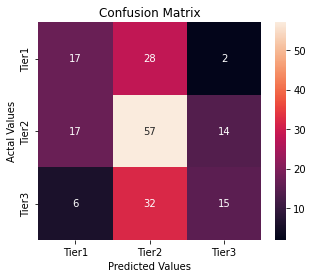

In [103]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [104]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.42      0.36      0.39        47
           2       0.49      0.65      0.56        88
           3       0.48      0.28      0.36        53

    accuracy                           0.47       188
   macro avg       0.47      0.43      0.43       188
weighted avg       0.47      0.47      0.46       188



# Create Balanced Random Forest Classifier

In [149]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=10000, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=10000, random_state=1)

In [150]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_RF)
#y_pred_RF[0:]=2
print(y_pred_RF)

[1 1 1 2 3 1 2 2 2 3 1 1 3 2 2 3 1 3 2 1 3 3 3 1 1 2 2 1 2 3 2 3 3 3 2 1 2
 2 1 2 1 1 3 3 1 3 3 3 2 3 3 2 1 1 2 2 1 3 1 1 3 3 1 2 3 1 3 1 1 2 2 1 2 1
 1 3 3 1 1 3 3 2 2 2 1 3 2 3 2 3 1 2 3 2 3 2 2 3 2 3 3 3 1 3 2 3 1 1 2 1 1
 2 3 1 3 3 1 1 1 1 2 2 2 3 3 1 2 3 1 2 3 3 2 2 2 2 2 3 1 1 2 2 2 1 1 2 1 1
 1 1 1 3 1 1 1 1 1 2 2 1 1 1 3 3 1 3 3 1 1 2 1 2 2 2 2 3 2 3 3 1 3 1 2 2 3
 2 1 1]


In [143]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.5319148936170213

In [144]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head()

,Prediction,Actual
618,2,1
53,2,1
289,2,3
221,2,2
232,2,2


In [145]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([2.49464405e-02, 1.13468325e-03, 8.97014505e-03, 5.41523823e-03,
       1.25662021e-02, 1.32028544e-02, 1.10868029e-02, 4.78130619e-03,
       2.19520510e-03, 4.64173174e-03, 1.13438919e-02, 6.62846759e-03,
       8.76367298e-03, 7.05443751e-03, 5.24567312e-03, 2.07841060e-03,
       4.64531182e-03, 5.04283251e-03, 1.22547792e-02, 1.13947248e-02,
       1.30772992e-02, 1.28049710e-03, 2.21617656e-03, 5.10272810e-03,
       1.14648859e-02, 9.92542437e-03, 8.20076915e-03, 2.80359902e-03,
       2.17773287e-03, 2.46852538e-03, 6.63690831e-03, 5.69629889e-03,
       6.20305655e-03, 2.70374406e-03, 3.12307361e-03, 9.73671316e-03,
       3.61090665e-03, 1.06342827e-02, 3.95564795e-03, 2.73444481e-04,
       4.25669582e-03, 8.60117556e-03, 4.64750227e-04, 3.49893575e-03,
       3.38468242e-03, 5.87481437e-03, 3.76805720e-03, 3.33712846e-03,
       4.37330000e-03, 1.60236234e-03, 2.79641416e-03, 5.24359838e-03,
       1.58194509e-03, 1.28332796e-03, 1.04158115e-03, 8.92572763e-04,
      

In [109]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)


[(0.023137408902365125, 'total_reviews'),
 (0.021296463456355764, 'Pizza_stars'),
 (0.01586892920120736, 'Italian_stars'),
 (0.015539450265506285, 'FastFood_stars'),
 (0.01537597438953793, 'American(Traditional)_stars'),
 (0.01511167057834177, 'Coffee&Tea_stars'),
 (0.014517625729607414, 'American(New)_stars'),
 (0.014093514793889692, 'Italian'),
 (0.013682244339068023, 'Seafood_stars'),
 (0.013574081537751415, 'Burgers_stars'),
 (0.013444864379720162, 'ChickenWings'),
 (0.013115129074599774, 'Breakfast&Brunch_stars'),
 (0.012653658189855184, 'American(New)'),
 (0.01264275598601574, 'FastFood'),
 (0.011984292752597958, 'Pizza'),
 (0.011795117950261409, 'Burgers'),
 (0.011563043103334301, 'American(Traditional)'),
 (0.010839953483143159, 'Sandwiches'),
 (0.01063251751774836, 'Chinese_stars'),
 (0.010571688524076146, 'Bars_stars'),
 (0.01053678591959947, 'Seafood'),
 (0.01029916176851867, 'Sandwiches_stars'),
 (0.01016826948868256, 'Mexican_stars'),
 (0.009873509271386612, 'ChickenWings_

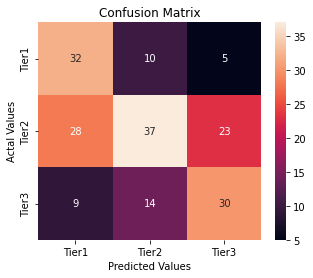

In [151]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [152]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.46      0.68      0.55        47
           2       0.61      0.42      0.50        88
           3       0.52      0.57      0.54        53

    accuracy                           0.53       188
   macro avg       0.53      0.56      0.53       188
weighted avg       0.55      0.53      0.52       188



# Create Easy Ensemble AdaBoost Classifier

In [112]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=100, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [113]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_Ada)

0.5823677359707067

In [114]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
618,1,1
53,1,1
289,1,3
221,2,2
232,3,2
726,2,2
472,3,2
351,2,2
344,1,1
388,3,2


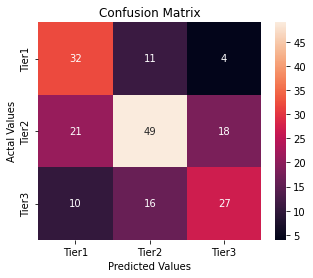

In [115]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [116]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.51      0.68      0.58        47
           2       0.64      0.56      0.60        88
           3       0.55      0.51      0.53        53

    accuracy                           0.57       188
   macro avg       0.57      0.58      0.57       188
weighted avg       0.58      0.57      0.57       188



# Create Gradient Boosting Classifier

In [117]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.544
Accuracy score (validation): 0.484

Learning rate:  0.1
Accuracy score (training): 0.585
Accuracy score (validation): 0.495

Learning rate:  0.25
Accuracy score (training): 0.717
Accuracy score (validation): 0.489

Learning rate:  0.5
Accuracy score (training): 0.824
Accuracy score (validation): 0.511

Learning rate:  0.75
Accuracy score (training): 0.861
Accuracy score (validation): 0.473

Learning rate:  1
Accuracy score (training): 0.891
Accuracy score (validation): 0.457



In [119]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=10,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
618,2,1
53,2,1
289,2,3
221,2,2
232,3,2
726,2,2
472,2,2
351,2,2
344,2,1
388,3,2


In [120]:
balanced_accuracy_score(y_test, y_pred_GBC)

0.4196166806564237

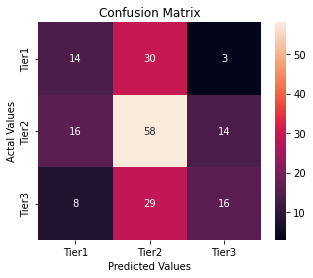

In [121]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [122]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.37      0.30      0.33        47
           2       0.50      0.66      0.57        88
           3       0.48      0.30      0.37        53

    accuracy                           0.47       188
   macro avg       0.45      0.42      0.42       188
weighted avg       0.46      0.47      0.45       188



# Naive Bayes model

In [123]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [124]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [125]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
618,1,1
53,3,1
289,3,3
221,3,2
232,3,2
726,3,2
472,3,2
351,2,2
344,3,1
388,1,2


In [126]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.34574468085106386


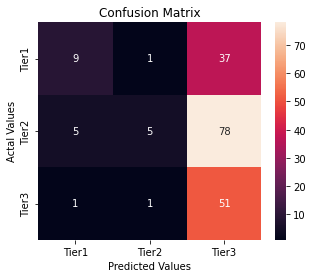

In [127]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [128]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.60      0.19      0.29        47
           2       0.71      0.06      0.11        88
           3       0.31      0.96      0.47        53

    accuracy                           0.35       188
   macro avg       0.54      0.40      0.29       188
weighted avg       0.57      0.35      0.25       188

